In [1]:
import random 
import shutil
import os
from os import listdir as ls
from os.path import join, isdir, isfile
import matplotlib.pyplot as plt
import numpy as np



from torch.utils.data.sampler import SubsetRandomSampler

import re
import json 
import copy
import torch
import torchvision
from torchvision import datasets, models, transforms
import torch.nn.functional as F
import torchvision.transforms.functional as TF
from PIL import Image
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

import networkx as nx
import copy
import time
import importlib

import sys
sys.path.append('/home/mdso/lepetitp/ppc/WEBCAMS/src/raincell')

In [2]:
# Vérification du caractère causal de la manip:
import torch
from torch.utils.data import Dataset, DataLoader
import os
import sys
sys.path.append('/home/mdso/lepetitp/ppc/WEBCAMS/src/raincell')
import torch.optim as optim
import ia.learning.dependencies.architectures_fcn  
import importlib
importlib.reload(ia.learning.dependencies.architectures_fcn)
from ia.learning.dependencies.architectures_fcn import UNet_causal, \
                                                      UNet_causal_5mn, \
                                                      UNet_causal_5mn_atrous
                                                      # UNet_1mn_causal_5mn_atrous
                                                      # UNet_pseudo1mn_causal_5mn_atrous 
# importlib.reload(ia.learning.dependencies.architectures_fcn)
# from ia.learning.dependencies.architectures_fcn import UNet_1mn_causal_5mn_atrous, \
#                                                        UNet_pseudo1mn_causal_5mn_atrous2, DeepLab_causal_5mn


"""
model = UNet_causal(2, 3, 64)

model = UNet_causal_5mn(2, 3, 64)

model = UNet_causal_5mn_atrous(2, 3, 64, dilation=1, atrous_rates=[6, 12, 18]).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
#receptive field de 237 minutes

model = UNet_1mn_causal_5mn_atrous(2, 3, 64, dilation=2, atrous_rates=[6, 12, 18]).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
#receptive field de 258 minutes
"""

model = UNet_causal_5mn_atrous(2, 3, 64, dilation=2, atrous_rates=[6, 12, 18, 24, 30, 36, 42]).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))



#receptive field de 497 minutes
"""
# model = UNet_1mn_causal_5mn_atrous(2, 3, 64, dilation=2, atrous_rates=[6, 12, 18, 24, 30, 36, 42]).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))
#receptive field de 498 minutes




# model = DeepLab_causal_5mn(
#     n_channels=2,
#     n_classes=3,
#     size=64,
#     n_blocks=[2, 2, 4, 3],
#     multi_grids=[1, 2, 4],
#     atrous_rates=[6, 12, 18]
# )
# # vrai DeepLab:     model = DeepLabV3Plus(
#     #     n_classes=21,
#     #     n_blocks=[3, 4, 23, 3],
#     #     atrous_rates=[6, 12, 18],
#     #     multi_grids=[1, 2, 4],
#     #     output_stride=16,
#     # )
# # receptive field 743 min 

# model = DeepLab_causal_5mn(
#     n_channels=2,
#     n_classes=3,
#     size=64,
#     n_blocks=[2, 2, 4, 3],
#     multi_grids=[1, 2, 4],
#     atrous_rates=[6, 12, 18, 24, 30, 36, 42]
# )
# receptive field 1223 min 

"""

'\n# model = UNet_1mn_causal_5mn_atrous(2, 3, 64, dilation=2, atrous_rates=[6, 12, 18, 24, 30, 36, 42]).to(torch.device("cuda" if torch.cuda.is_available() else "cpu"))\n#receptive field de 498 minutes\n\n\n\n\n# model = DeepLab_causal_5mn(\n#     n_channels=2,\n#     n_classes=3,\n#     size=64,\n#     n_blocks=[2, 2, 4, 3],\n#     multi_grids=[1, 2, 4],\n#     atrous_rates=[6, 12, 18]\n# )\n# # vrai DeepLab:     model = DeepLabV3Plus(\n#     #     n_classes=21,\n#     #     n_blocks=[3, 4, 23, 3],\n#     #     atrous_rates=[6, 12, 18],\n#     #     multi_grids=[1, 2, 4],\n#     #     output_stride=16,\n#     # )\n# # receptive field 743 min \n\n# model = DeepLab_causal_5mn(\n#     n_channels=2,\n#     n_classes=3,\n#     size=64,\n#     n_blocks=[2, 2, 4, 3],\n#     multi_grids=[1, 2, 4],\n#     atrous_rates=[6, 12, 18, 24, 30, 36, 42]\n# )\n# receptive field 1223 min \n\n'

In [13]:
#Modèle entraîné:
from ia.learning.dependencies.architectures import load_archi
batch_size = 128
num_epochs = 0
archi = None 
load = None
prefixe = None
step_size = None
gamma = None
crop_size = 2 * 24 * 60 * 4
crop_step = 1
lr = None
weighting = "linear"
completion = True
min_input_value = -10 
random_shifts = False
additive_noise = False
rescale_inputs = None
size_model = None
long_receptive_field = False
rescale_targets = "nan_padding"
size_train_epoch = int(100_000 * 10_000 / (2 * 24 * 60 * 4))
nchannels = 2
nclasses = 3
num_workers = 8

# Reprod.
torch.manual_seed(18)

# GPU
k = 0
device = torch.device("cuda:" + str(k))

# Directories
dir_data = '/scratch/mdso/lepetitp/ppc/RAINCELL/datasets/debiasing_20240430'
dir_models = "/scratch/mdso/lepetitp/ppc/RAINCELL/models/models_debiasing_20240430"



exp = "exp29"
name = "20240526_exp29_atrous_long_receptive_field_longerpoch_UNet_causal_5mn_atrous_lr1step_size30_gamma300_crop_size12720_crop_step1_bm.checkpoint"

# exp = "exp0"
# name = '20240506_exp0_UNet_causal_lr1step_size10000_gamma300_crop_size11520_bm.checkpoint'

if exp == "exp29":
    completion = True
    min_input_value = -10 
    rescale_inputs = None
    rescale_targets = "nan_padding"
    archi = "UNet_causal_5mn_atrous"
    size_model = 64
    long_receptive_field = True
    
elif exp == "exp0":
    completion = True
    min_input_value = -2 
    rescale_inputs = None
    rescale_targets = "nan_padding"
    archi = "UNet_causal"
    size_model = 64
    long_receptive_field = False    




if long_receptive_field :
    dilation=2
    atrous_rates=[6, 12, 18, 24, 30, 36, 42]
    model = load_archi(archi, nchannels, nclasses, size=size_model, dilation=dilation, atrous_rates=atrous_rates)

else:
    model = load_archi(archi, nchannels, nclasses, size=size_model, atrous_rates=[6, 12, 18])


checkpoint = torch.load(join(dir_models, name), map_location=torch.device('cpu'))
try:
    model.load_state_dict(checkpoint['model_state_dict'])
except:
    model.load_state_dict(checkpoint['model'])
# model = model.to(device)
model.eval()

UNet_causal_5mn_atrous(
  (inc): double_conv_causal(
    (conv1): Conv1d(2, 64, kernel_size=(3,), stride=(1,))
    (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv1d(64, 64, kernel_size=(3,), stride=(1,))
    (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU(inplace=True)
  )
  (down1): Down_causal(
    (mpconv): Sequential(
      (0): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): double_conv_causal(
        (conv1): Conv1d(64, 128, kernel_size=(3,), stride=(1,))
        (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv2): Conv1d(128, 128, kernel_size=(3,), stride=(1,))
        (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
      )
    )
  )
  

In [14]:
# Count the number of weights:

import torch.nn as nn

def count_layers(model):
    conv_layers = sum(1 for _ in model.modules() if isinstance(_, nn.Conv1d))
    pooling_layers = sum(1 for _ in model.modules() if isinstance(_, nn.MaxPool1d))
    transpose_conv_layers = sum(1 for _ in model.modules() if isinstance(_, nn.ConvTranspose1d))
    total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    
    return {
        "Total parameters": total_params,
        "Number of convolutional layers": conv_layers,
        "Number of pooling layers": pooling_layers,
        "Number of transpose convolutional layers": transpose_conv_layers
    }

count_layers(model)

{'Total parameters': 3053957,
 'Number of convolutional layers': 25,
 'Number of pooling layers': 3,
 'Number of transpose convolutional layers': 3}

In [15]:
import torch
import copy
# Create a tensor of size [1, 10000, 2] filled with zeros
input_tensor1 = torch.zeros(1, 2, 10000)
input_tensor2 = torch.zeros(1, 2, 10000)

input_tensor1 = torch.rand(1, 2, 10000)
input_tensor2 = copy.deepcopy(input_tensor1)

# Set the 5000th position to 1 in both channels
pos = 6000

input_tensor1[0, :, pos] = 10.  # Indices are 0-based in Python

output = model(input_tensor1)
print(output.shape)
print(input_tensor1.shape)

rand_500min_time_step_15sec = torch.rand(1, 2, 500 * 4)

torch.Size([1, 3, 10000])
torch.Size([1, 2, 10000])


In [16]:
inputs = torch.ones(2, 10)
inputs[0,5] = 2

medians =  torch.median(inputs, dim=1).values.view(2,1)
bias = medians * torch.rand(2,1) - 0.5*medians
new_scale =  (0.7 + 0.3*torch.rand(2,1))
inputs = (inputs - medians) * new_scale  + bias 
print(new_scale, bias, inputs)

tensor([[0.7302],
        [0.9961]]) tensor([[-0.1424],
        [-0.3619]]) tensor([[-0.1424, -0.1424, -0.1424, -0.1424, -0.1424,  0.5878, -0.1424, -0.1424,
         -0.1424, -0.1424],
        [-0.3619, -0.3619, -0.3619, -0.3619, -0.3619, -0.3619, -0.3619, -0.3619,
         -0.3619, -0.3619]])


In [17]:
print(bias)

tensor([[-0.1424],
        [-0.3619]])


In [18]:

from torch.profiler import profile, record_function, ProfilerActivity


# Calculate memory usage
with profile(activities=[ProfilerActivity.CPU], record_shapes=True) as prof:
    with record_function("model_inference"):
        model(rand_500min_time_step_15sec)
print(prof.key_averages().table(sort_by="cpu_time_total", row_limit=10))

[W kineto_shim.cpp:358] Adding profiling metadata requires using torch.profiler with Kineto support (USE_KINETO=1)


---------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                             Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg    # of Calls  
---------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  
                  model_inference         2.40%       2.634ms       100.00%     109.908ms     109.908ms             1  
                aten::convolution         0.39%     426.000us        75.95%      83.476ms       2.981ms            28  
               aten::_convolution         1.76%       1.939ms        75.56%      83.050ms       2.966ms            28  
                     aten::conv1d         1.51%       1.659ms        74.34%      81.706ms       3.268ms            25  
         aten::mkldnn_convolution        71.91%      79.031ms        72.13%      79.276ms       3.303ms            24  
                 aten::batch_norm       

In [19]:
#Temps d'inférence:
import timeit
def apply_model():
    with torch.no_grad():  # Ensuring no gradients are calculated
        model(rand_500min_time_step_15sec)

# Timing the function over 10 runs and calculating the mean time
times = timeit.repeat(apply_model, number=1, repeat=10)
mean_time = sum(times) / len(times)

print(f"Average inference time over 10 runs: {mean_time:.4f} seconds")

Average inference time over 10 runs: 0.1148 seconds


In [23]:
import torch
import torchvision.models as models
from fvcore.nn import FlopCountAnalysis

# Define a model, e.g., ResNet
model2 = models.resnet18()

# Create a sample input tensor with the correct shape
input2 = torch.randn(1, 3, 224, 224)

# Perform FLOP count
flops = FlopCountAnalysis(model2, input2)
# flops = FlopCountAnalysis(model, rand_500min_time_step_15sec)

# Print total FLOPs
print(f"Total FLOPs: {flops.total()}")
#ModuleNotFoundError: No module named 'iopath'

Unsupported operator aten::add_ encountered 28 time(s)
Unsupported operator aten::max_pool2d encountered 1 time(s)


Total FLOPs: 1826516992


In [283]:
def reset_model_weights(model):
    for layer in model.modules():
        if isinstance(layer, (torch.nn.Conv1d, torch.nn.ConvTranspose1d)):
            torch.nn.init.constant_(layer.weight, 0.1)  # Set all convolutional weights to 1
            torch.nn.init.constant_(layer.bias, 0)    # Set all biases to 0
        elif isinstance(layer, torch.nn.BatchNorm1d):
            torch.nn.init.constant_(layer.weight, 0.1)  # Set gamma to 1
            torch.nn.init.constant_(layer.bias, 0)    # Set beta to 0
            layer.running_mean.zero_()                # Zero out running mean
            layer.running_var.fill_(1)                # Set running variance to 1


def reset_model_weights2(model):
    for layer in model.modules():
        if isinstance(layer, (torch.nn.Conv1d, torch.nn.ConvTranspose1d)):
            torch.nn.init.constant_(layer.weight, 0.05)  # Set all convolutional weights to 1
            torch.nn.init.constant_(layer.bias, 0.)    # Set all biases to 0.1
        elif isinstance(layer, torch.nn.BatchNorm1d):
            torch.nn.init.constant_(layer.weight, 0.05)  # Set gamma to 1
            torch.nn.init.constant_(layer.bias, 0.)    # Set beta to 0
            layer.running_mean.zero_()                # Zero out running mean
            layer.running_var.fill_(1)    


def reset_model_weights3(model):
    for layer in model.modules():
        if isinstance(layer, (torch.nn.Conv1d, torch.nn.ConvTranspose1d)):
            # torch.nn.init.constant_(layer.weight, 0.05)  # Set all convolutional weights to 1
            torch.nn.init.constant_(layer.bias, 0.)    # Set all biases to 0.1
        elif isinstance(layer, torch.nn.BatchNorm1d):
            # torch.nn.init.constant_(layer.weight, 0.05)  # Set gamma to 1
            torch.nn.init.constant_(layer.bias, 0.)    # Set beta to 0
            layer.running_mean.zero_()                # Zero out running mean
            layer.running_var.fill_(1)   


def reset_model_weights4(model):
    for layer in model.modules():
        if isinstance(layer, torch.nn.BatchNorm1d):
            # torch.nn.init.constant_(layer.weight, 0.05)  # Set gamma to 1et beta to 0
            layer.running_mean.zero_()                # Zero out running mean
            layer.running_var.fill_(1)  

# reset_model_weights3(model)


In [351]:
def test_causality_and_receptive_field(model, input_tensor1, input_tensor2, pos):
    # Assuming model has been modified as above and is in eval mode for testing
    model.eval()
    output = model(input_tensor1) - model(input_tensor2)
    
    # Find the first and last non-zero outputs
    non_zero_indices = (output[0,0,:] != 0).nonzero(as_tuple=True)
    first_non_zero = non_zero_indices[0].min().item()
    last_non_zero = non_zero_indices[0].max().item()
    
    print("First non-zero output at index:", first_non_zero)
    print("Last non-zero output at index:", last_non_zero)
    print("length of receptive field:",  last_non_zero - first_non_zero)
    # Check causality
    if first_non_zero < pos:
        print("The model is not causal.")
    else:
        print("The model is causal.")

    return output
    
output = test_causality_and_receptive_field(model, input_tensor1, input_tensor2, pos)



First non-zero output at index: 6000
Last non-zero output at index: 7987
length of receptive field: 1987
The model is causal.


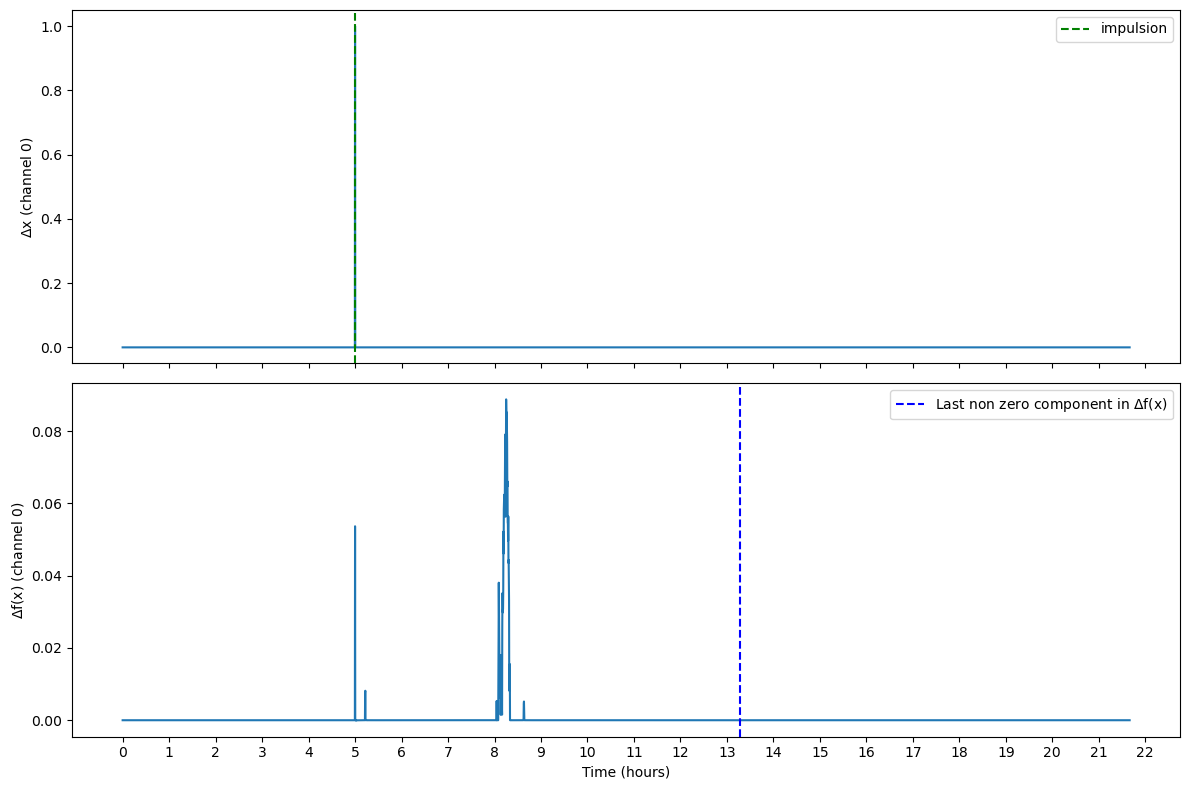

In [352]:
import torch
import matplotlib.pyplot as plt
import numpy as np

# Example data
tensor1 = torch.zeros(1000)
tensor2 = torch.zeros(1000)
tensor1[100] = 1  # Random '1' at position 100
tensor2[300] = 5  # Random non-zero value at position 300 for demonstration

tensor1 = input_tensor[0, 1, :].detach()
tensor2 = output[0, 1, :].detach() 

tensor1 = input_tensor[0, 0, (pos -  5 * 3600 // 15):].detach()
tensor2 = output[0, 0, (pos - 5 * 3600 // 15):].detach() 
# print(torch.max(tensor2))
# Find the index of the '1' in tensor1
index1 = (tensor1 == 1).nonzero(as_tuple=True)[0].item()

# Find the index of the last non-zero in tensor2
index2 = (tensor2 != 0).nonzero(as_tuple=True)[0].max().item()

# Set up the time axis (15 sec interval, convert to hours)
time_steps = tensor1.numel()
time_hours = np.arange(time_steps) * 15 / 3600  # Convert seconds to hours
time_5min = np.arange(time_steps) * 15  / 240  # Convert seconds to hours

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# First subplot
axs[0].plot(time_hours, tensor1.numpy())
axs[0].axvline(x=time_hours[index1], color='green', linestyle='--', label='impulsion')
axs[0].set_ylabel('$\Delta$x (channel 0)')
axs[0].legend()

# Second subplot
axs[1].plot(time_hours, tensor2.numpy())
axs[1].axvline(x=time_hours[index2], color='blue', linestyle='--', label='Last non zero component in $\Delta$f(x)')
axs[1].set_ylabel('$\Delta$f(x) (channel 0)')
axs[1].legend()

# Set x-axis details
plt.xticks(np.arange(0, time_hours[-1] + 1, 1))  # Ticks every hour
axs[1].set_xlabel('Time (hours)')

# Display the plot
plt.tight_layout()
plt.show()


tensor(0.0537)


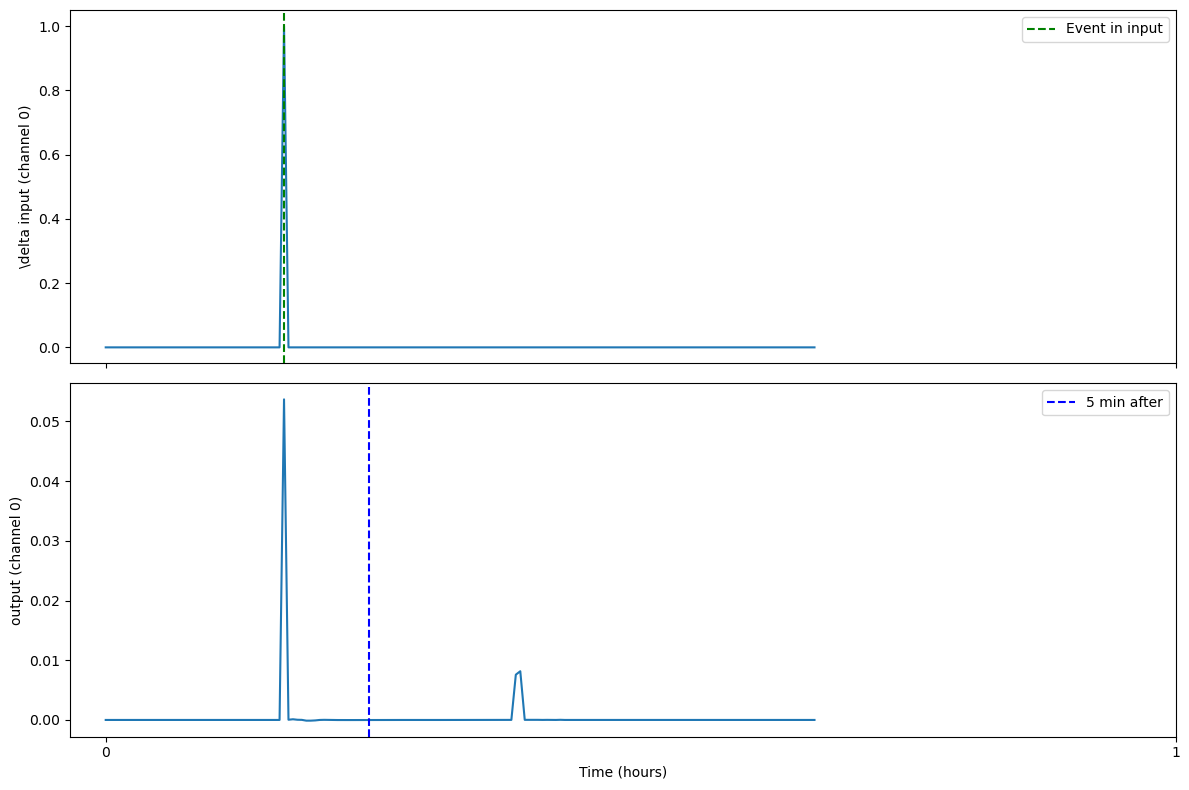

In [353]:
# Example data
tensor1 = torch.zeros(1000)
tensor2 = torch.zeros(1000)
tensor1[100] = 1  # Random '1' at position 100
tensor2[300] = 5  # Random non-zero value at position 300 for demonstration

tensor1 = input_tensor[0, 1, :].detach()
tensor2 = output[0, 1, :].detach() 

tensor1 = input_tensor[0, 0, (pos -  1 * 3600 // 90):(pos + 3 * 3600 // 90)].detach()
tensor2 = output[0, 0, (pos - 1 * 3600 // 90):(pos + 3 * 3600 // 90)].detach() 
print(torch.max(tensor2))
# Find the index of the '1' in tensor1
index1 = (tensor1 == 1).nonzero(as_tuple=True)[0].item()

# Find the index of the last non-zero in tensor2
index2 = index1 + 19 #(tensor2 != 0).nonzero(as_tuple=True)[0].max().item()

# Set up the time axis (15 sec interval, convert to hours)
time_steps = tensor1.numel()
time_hours = np.arange(time_steps) * 15 / 3600  # Convert seconds to hours
time_5min = np.arange(time_steps) * 15  / 240  # Convert seconds to hours

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# First subplot
axs[0].plot(time_hours, tensor1.numpy())
axs[0].axvline(x=time_hours[index1], color='green', linestyle='--', label='Event in input')
axs[0].set_ylabel('\delta input (channel 0)')
axs[0].legend()

# Second subplot
axs[1].plot(time_hours, tensor2.numpy())
axs[1].axvline(x=time_hours[index2], color='blue', linestyle='--', label='5 min after')
axs[1].set_ylabel('output (channel 0)')
axs[1].legend()

# Set x-axis details
plt.xticks(np.arange(0, time_hours[-1] + 1, 1))  # Ticks every hour
axs[1].set_xlabel('Time (hours)')

# Display the plot
plt.tight_layout()
plt.show()